In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns

In [2]:
from scipy.signal import find_peaks
from scipy.stats import pearsonr
sns.set()

# Prediction analysis on chromosome 4 

CNN was trained to reproduce the per genes RNA_seq reads counts (BY4742 replica 1) and another one on (Syn3C replica 01). We study in this part the effect of being trained on anoter replica on the prediction on chr 4.

In [3]:
WINDOW = 2001
HALF_WX = WINDOW//2

In [4]:
# Trained on SRR7131299

y_pred_fw_wt_299 = np.load('/users/invites/routhier/Documents/Projet_RNA_seq/Results_RNA_seq/y_pred_fw_CNN_RNA_seq_2001_12_8_4_BY4742_rep01_fw_count_per_genes.npy')
y_pred_bw_wt_299 = np.load('/users/invites/routhier/Documents/Projet_RNA_seq/Results_RNA_seq/y_pred_bw_CNN_RNA_seq_2001_12_8_4_BY4742_rep01_bw_count_per_genes.npy')

# Trained on SRR7131302

y_pred_fw_wt_302 = np.load('/users/invites/routhier/Documents/Projet_RNA_seq/Results_RNA_seq/y_pred_fw_CNN_RNA_seq_2001_12_8_4_Syn3C_rep01_fw_count_per_genes.npy')
y_pred_bw_wt_302 = np.load('/users/invites/routhier/Documents/Projet_RNA_seq/Results_RNA_seq/y_pred_bw_CNN_RNA_seq_2001_12_8_4_Syn3C_rep01_bw_count_per_genes.npy')

In [5]:
# SRR7131299 and SRR7131302 aligned on chromosome 4 

y_true_fw_wt_299 = pd.read_csv('/users/invites/routhier/Documents/Projet_RNA_seq/Start_data/BY4742_rep01_fw_count_per_genes.csv')
y_true_bw_wt_299 = pd.read_csv('/users/invites/routhier/Documents/Projet_RNA_seq/Start_data/BY4742_rep01_bw_count_per_genes.csv')

y_true_fw_wt_302 = pd.read_csv('/users/invites/routhier/Documents/Projet_RNA_seq/Start_data/Syn3C_rep01_fw_count_per_genes.csv')
y_true_bw_wt_302 = pd.read_csv('/users/invites/routhier/Documents/Projet_RNA_seq/Start_data/Syn3C_rep01_bw_count_per_genes.csv')

y_true_fw_wt_299 = y_true_fw_wt_299[y_true_fw_wt_299.chr == 'chr4'].value.values
y_true_bw_wt_299 = y_true_bw_wt_299[y_true_bw_wt_299.chr == 'chr4'].value.values

y_true_fw_wt_302 = y_true_fw_wt_302[y_true_fw_wt_302.chr == 'chr4'].value.values
y_true_bw_wt_302 = y_true_bw_wt_302[y_true_bw_wt_302.chr == 'chr4'].value.values

In [6]:
y_true_fw_wt_299 = y_true_fw_wt_299.astype(np.float32)
y_true_bw_wt_299 = y_true_bw_wt_299.astype(np.float32)

y_true_fw_wt_299[y_true_fw_wt_299 > 0] = np.log(y_true_fw_wt_299[y_true_fw_wt_299 > 0])
y_true_bw_wt_299[y_true_bw_wt_299 > 0] = np.log(y_true_bw_wt_299[y_true_bw_wt_299 > 0])

y_true_fw_wt_302 = y_true_fw_wt_302.astype(np.float32)
y_true_bw_wt_302 = y_true_bw_wt_302.astype(np.float32)

y_true_fw_wt_302[y_true_fw_wt_302 > 0] = np.log(y_true_fw_wt_302[y_true_fw_wt_302 > 0])
y_true_bw_wt_302[y_true_bw_wt_302 > 0] = np.log(y_true_bw_wt_302[y_true_bw_wt_302 > 0])


In [7]:
y_true_fw_wt_299 = y_true_fw_wt_299[HALF_WX : - HALF_WX]
y_true_bw_wt_299 = y_true_bw_wt_299[HALF_WX : - HALF_WX]

y_true_fw_wt_302 = y_true_fw_wt_302[HALF_WX : - HALF_WX]
y_true_bw_wt_302 = y_true_bw_wt_302[HALF_WX : - HALF_WX]

In [8]:
y_pred_bw_wt_299 = y_pred_bw_wt_299[::-1]
y_pred_bw_wt_302 = y_pred_bw_wt_302[::-1]

### Comparing the prediction coming from two differently trained CNN

We study in this part the effect of being trained on anoter replica on the prediction on chr 4, namely one was trained on the BY4742 replica (SRR7131299) one and the other one on the replica 1 Syn3C (SRR7131302). (Only on the forward strand).

Text(150000,12,' correlation : 0.914436757565')

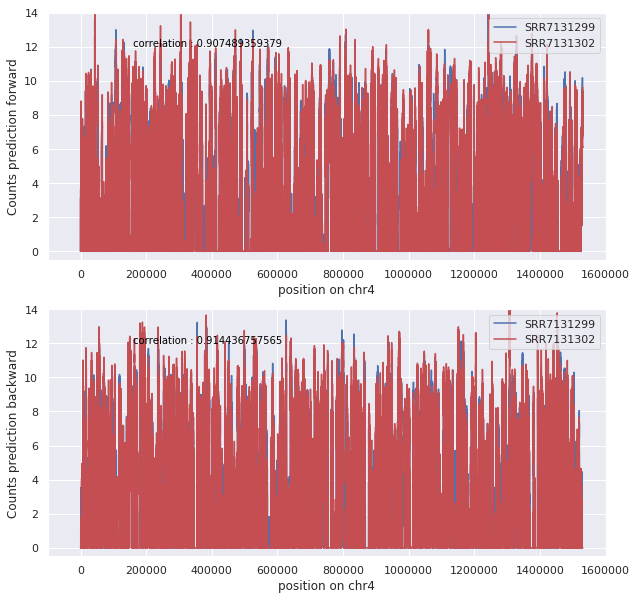

In [9]:
fig = plt.figure(figsize=(10,10))

ax = [None for _ in range(2)]
ax[0] = fig.add_subplot(2,1,1)

ax[0].plot(y_pred_fw_wt_299, color='b', label='SRR7131299')
ax[0].plot(y_pred_fw_wt_302, color='r', label='SRR7131302')
ax[0].axis([-100000,1600000,-0.5,14])
ax[0].legend(loc='upper right')
ax[0].set(xlabel='position on chr4', ylabel='Counts prediction forward')
ax[0].text(150000, 12, ' correlation : {}'.format(pearsonr(y_pred_fw_wt_299, y_pred_fw_wt_302)[0]), color='black', size=10,
       bbox=dict(facecolor='none', edgecolor='none'))

ax[1] = fig.add_subplot(2,1,2)

ax[1].plot(y_pred_bw_wt_299, color='b', label='SRR7131299')
ax[1].plot(y_pred_bw_wt_302, color='r', label='SRR7131302')
ax[1].axis([-100000,1600000,-0.5,14])
ax[1].legend(loc='upper right')
ax[1].set(xlabel='position on chr4', ylabel='Counts prediction backward')
ax[1].text(150000, 12, ' correlation : {}'.format(pearsonr(y_pred_bw_wt_299, y_pred_bw_wt_302)[0]), color='black', size=10,
       bbox=dict(facecolor='none', edgecolor='none'))

### Prediction vs experimental (SRR7131299)

The prediction are displayed for replica one on genome BY4742 as it was predicted on S288C genome (really close to BY4742) and not on Syn3C.

Text(150000,12,' correlation : 0.852205455303')

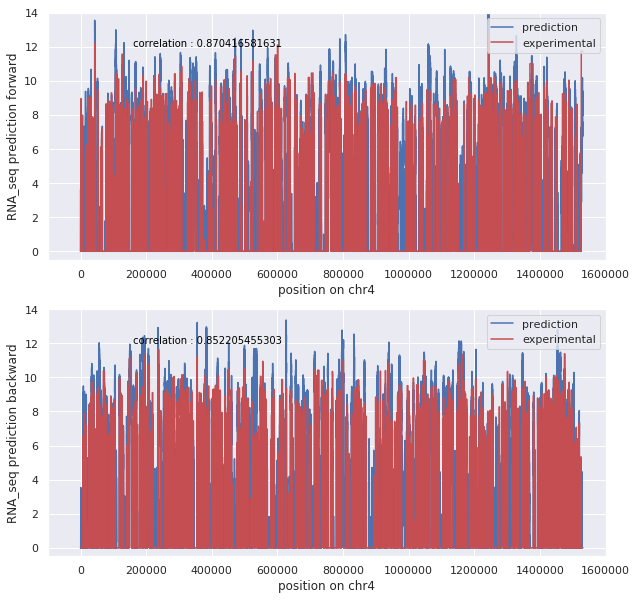

In [10]:
fig = plt.figure(figsize=(10,10))

ax = [None for _ in range(2)]
ax[0] = fig.add_subplot(2,1,1)

ax[0].plot(y_pred_fw_wt_299, color='b', label='prediction')
ax[0].plot(y_true_fw_wt_299, color='r', label='experimental')
ax[0].axis([-100000,1600000,-0.5,14])
ax[0].legend(loc='upper right')
ax[0].set(xlabel='position on chr4', ylabel='RNA_seq prediction forward')
ax[0].text(150000, 12, ' correlation : {}'.format(pearsonr(y_pred_fw_wt_299, y_true_fw_wt_299)[0]), color='black', size=10,
       bbox=dict(facecolor='none', edgecolor='none'))

ax[1] = fig.add_subplot(2,1,2)

ax[1].plot(y_pred_bw_wt_299, color='b', label='prediction')
ax[1].plot(y_true_bw_wt_299, color='r', label='experimental')
ax[1].axis([-100000,1600000,-0.5,14])
ax[1].legend(loc='upper right')
ax[1].set(xlabel='position on chr4', ylabel='RNA_seq prediction backward')
ax[1].text(150000, 12, ' correlation : {}'.format(pearsonr(y_pred_bw_wt_299, y_true_bw_wt_299)[0]), color='black', size=10,
       bbox=dict(facecolor='none', edgecolor='none'))

### Mean gene activity

We represent scatter plots of mean gene activation for every pair in the experimental alignment and the prediction coming from both CNN. The gene positioning is already known. The true array SRR7131302 contains the experimental results on the mutated parts and we want to see the difference in expression found experimentally in this region. For the other we want them to be close.

In [11]:
annotation = pd.read_csv('/home/invites/routhier/Projet_RNA_seq/Start_data/annotation_s_cerevisiae/Saccharomyces_cerevisiae.R64-1-1.95.chromosome.IV.gff3', sep = '\t')
annotation = annotation[annotation.type == 'gene']
annotation.head()

,chr,1,type,start,stop,2,strand,3,4
2,IV,sgd,gene,1802.0,2953.0,.,+,.,ID=gene:YDL248W;biotype=protein_coding;descrip...
7,IV,sgd,gene,3762.0,3836.0,.,+,.,ID=gene:YDL247W-A;biotype=protein_coding;descr...
12,IV,sgd,gene,5985.0,7814.0,.,+,.,ID=gene:YDL247W;biotype=protein_coding;descrip...
17,IV,sgd,gene,8683.0,9756.0,.,-,.,ID=gene:YDL246C;biotype=protein_coding;descrip...
22,IV,sgd,gene,11657.0,13360.0,.,-,.,ID=gene:YDL245C;biotype=protein_coding;descrip...


In [12]:
annotation_fw = annotation[annotation.strand == '+'].copy()
annotation_bw = annotation[annotation.strand == '-'].copy()

OFFSET = 100

gene_fw = zip(annotation_fw.start.values - HALF_WX, annotation_fw.stop.values - HALF_WX)
gene_bw = zip(annotation_bw.start.values - HALF_WX, annotation_bw.stop.values - HALF_WX)

mean_activity_true_fw_299 = np.array([np.mean(y_true_fw_wt_299[int(start) : int(stop)]) for start, stop in gene_fw])
mean_activity_true_bw_299 = np.array([np.mean(y_true_bw_wt_299[int(start) : int(stop)]) for start, stop in gene_bw])
mean_activity_true_299 = np.append(mean_activity_true_fw_299, mean_activity_true_bw_299)

mean_activity_true_fw_302 = np.array([np.mean(y_true_fw_wt_302[int(start) : int(stop)]) for start, stop in gene_fw])
mean_activity_true_bw_302 = np.array([np.mean(y_true_bw_wt_302[int(start) : int(stop)]) for start, stop in gene_bw])
mean_activity_true_302 = np.append(mean_activity_true_fw_302, mean_activity_true_bw_302)

mean_activity_pred_fw_299 = np.array([np.mean(y_pred_fw_wt_299[int(start) + OFFSET : int(stop) - OFFSET]) for start, stop in gene_fw])
mean_activity_pred_bw_299 = np.array([np.mean(y_pred_bw_wt_299[int(start) + OFFSET : int(stop) - OFFSET]) for start, stop in gene_bw])
mean_activity_pred_299 = np.append(mean_activity_pred_fw_299, mean_activity_pred_bw_299)

mean_activity_pred_fw_302 = np.array([np.mean(y_pred_fw_wt_302[int(start) + OFFSET : int(stop) - OFFSET]) for start, stop in gene_fw])
mean_activity_pred_bw_302 = np.array([np.mean(y_pred_bw_wt_302[int(start) + OFFSET : int(stop) - OFFSET]) for start, stop in gene_bw])
mean_activity_pred_302 = np.append(mean_activity_pred_fw_302, mean_activity_pred_bw_302)

/users/invites/routhier/anaconda2/envs/ipykernel_py2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/users/invites/routhier/anaconda2/envs/ipykernel_py2/lib/python2.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


In [13]:
strand = np.array(['+' for _ in range(len(gene_fw))])
strand_ =  np.array(['-' for _ in range(len(gene_bw))])
strand = np.append(strand, strand_)

In [14]:
mean_activity = pd.DataFrame({'SRR7131299_true' : mean_activity_true_299,
                              'SRR7131302_true' : mean_activity_true_302,
                              'SRR7131299_pred' : mean_activity_pred_299,
                              'SRR7131302_pred' : mean_activity_pred_302,
                              'strand' : strand})
mean_activity.head()

,SRR7131299_pred,SRR7131299_true,SRR7131302_pred,SRR7131302_true,strand
0,6.666694,8.958154,6.430524,8.904359,+
1,NaN,2.995732,NaN,4.795791,+
2,3.932036,7.978310,4.044998,7.623153,+
3,7.319433,5.983935,8.364956,5.910797,+
4,4.345848,5.513428,4.212914,5.062595,+


/users/invites/routhier/anaconda2/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


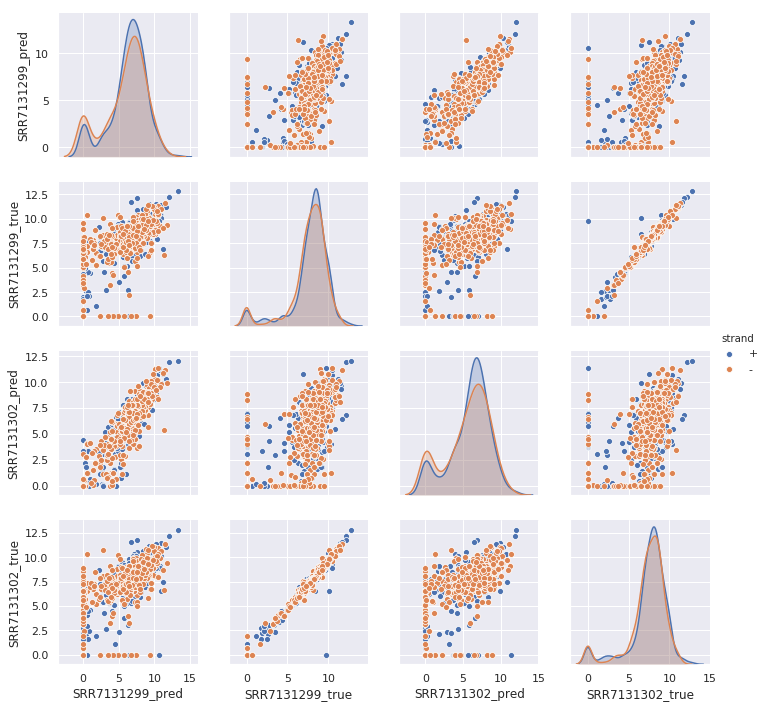

In [15]:
mean_activity = mean_activity.dropna()
sns.pairplot(mean_activity, hue='strand')